In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from Bio.Align import PairwiseAligner

In [6]:
amp_df = pd.read_csv('../data/AMP_new/AMP_2024_09_13_.tsv', sep='\t', header=None)
lab_df = pd.read_excel('../data/lab-validated/20250304-100c_AMPs_sequence.xlsx')

In [23]:
train_sequences = amp_df[amp_df[3] == 1][2]
val_sequences = lab_df['sequence']

Computing Similarities: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.92it/s]


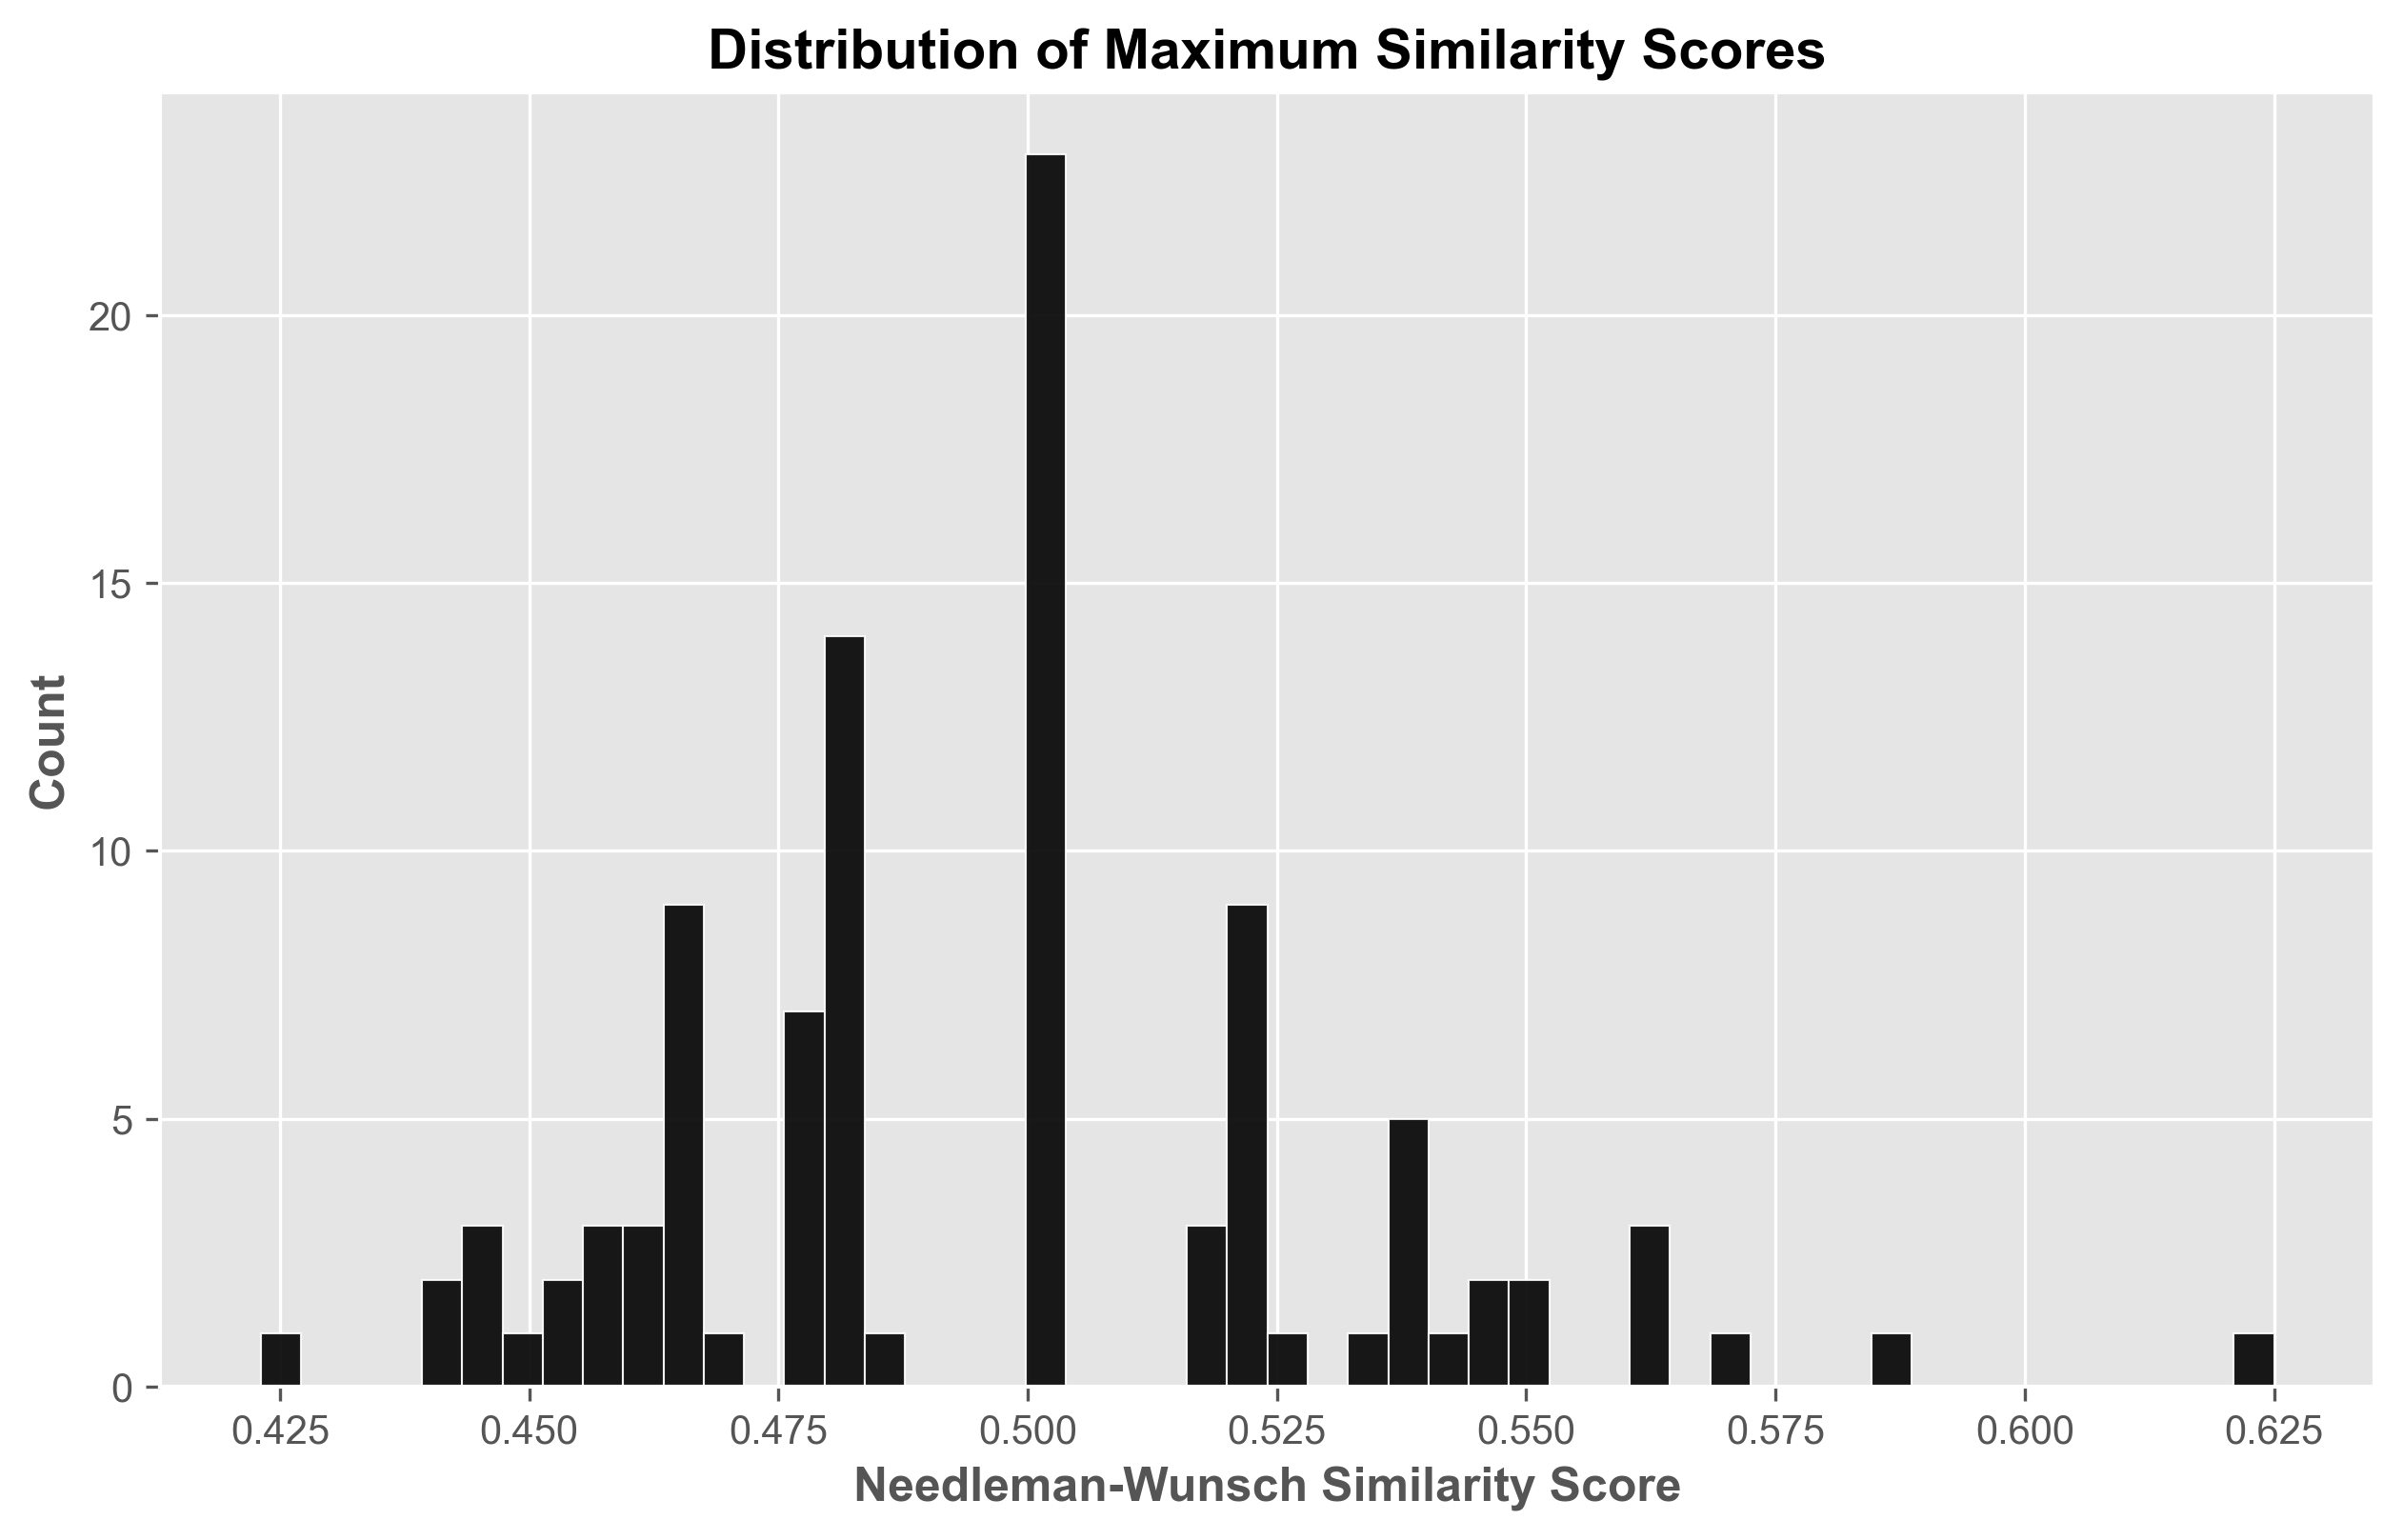

In [26]:
aligner = PairwiseAligner()
aligner.mode = 'global'

def needleman_wunsch_similarity(seq1, seq2):
    score = aligner.score(seq1, seq2)
    return score / max(len(seq1), len(seq2))

max_similarities = []

# Compute maximum similarity for each validated sequence
for val_seq in tqdm(val_sequences, desc="Computing Similarities"):
    similarities = [needleman_wunsch_similarity(val_seq, train_seq) for train_seq in train_sequences]
    max_similarities.append(max(similarities))

# Plot histogram in Nature journal style
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
ax.hist(max_similarities, bins=50, color='black', edgecolor='white', alpha=0.9)
ax.set_xlabel("Needleman-Wunsch Similarity Score", fontsize=12, fontweight='bold')
ax.set_ylabel("Count", fontsize=12, fontweight='bold')
ax.set_title("Distribution of Maximum Similarity Scores", fontsize=14, fontweight='bold')
plt.rcParams["font.family"] = "Arial"
plt.savefig("NW_histogram.png", dpi=300, bbox_inches='tight')
plt.show()

